<h1><center>Figure5: detailed load analysis</center></h1><br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from matplotlib.backends.backend_pdf import PdfPages
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter

C:\Users\walzb\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


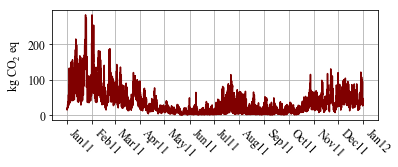

In [3]:
rng = pd.date_range('1/1/2011 00:00:00', periods=8758, freq='H')
tips2 = pd.read_csv('Figure5Data-ab_v2_revision.csv')
tips2.index = rng
labels = [fill(l, 25) for l in tips2.columns]
with PdfPages('RenewArticlFig5.pdf') as pdf: 
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.rc('axes', labelsize=12)
    # width as measured in inkscape
    width = 3.487
    height = width / 1.618
    
    def two_scales(ax1, time, data1, data2, c1, c2):
#         ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, label = labels[0])
#         ax1.set_xlabel('time (s)')
#         ax1.set_ylabel(labels[1])
        #ax1.set_ylim([-0.15, 0.1])
        ax1.grid(b = True)
        ax1.set_axisbelow(True)
        vals = ax1.get_yticks()
#         #ax1.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
#         ax2.plot(time, data2, color=c2, label = labels[2])
# #         ax2.set_ylabel(labels[2])
#         #ax2.set_ylim([0, 0.5])
#         vals = ax2.get_yticks()
#         ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    #ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        return ax1, ax2
    
    def two_scales_2(ax1, time, data1, data2, c1, c2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, label = labels[1])
#         ax1.set_xlabel('time (s)')
#         ax1.set_ylabel(labels[1])
        ax1.set_ylim([-0.15, 0.1])
        ax1.grid(b = True)
        ax1.set_axisbelow(True)
        vals = ax1.get_yticks()
        ax1.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
        ax2.plot(time, data2, color=c2, label = labels[3])
#         ax2.set_ylabel(labels[2])
        #ax2.set_ylim([0, 0.5])
        vals = ax2.get_yticks()
        ax2.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    #ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        return ax1, ax2

    # Create some mock data
    t = tips2.index
    s0 = tips2["Ontario's electricity mix climate change impact"]
    s1 = tips2["Instantaneous climate change impact reduction"]
    s2 = tips2["Pro-environmental behavior adoption rate"]
    s3 = tips2["Cumulative climate change impact reduction"]

    # Create axes
    fig, (ax1) = plt.subplots(1, sharex=False, figsize=(5.5, 2.16))
#     ax1.plot(t, s0, 'k-', label = labels[0])
#     ax1.grid(b = True)
#     ax1.set_axisbelow(True)
    ax1.plot(t, s0, 'maroon')
    ax1.set_ylabel("kg $\mathregular{CO_{2}}$ eq")
    ax1.grid(b = True)
    ax1.set_axisbelow(True)

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)

    color_y_axis(ax1, 'k')
    #color_y_axis(ax1a, 'red')
    
    months = MonthLocator()
    monthsFmt = DateFormatter("%b" '%y')
    ax1.xaxis.set_major_locator(months)
    ax1.xaxis.set_major_formatter(monthsFmt)
    
    ax1.xaxis.set_visible(True)
    
    #plt.gcf().text(0.03, 0.6, "a)", weight="black", fontsize=8)
    #plt.gcf().text(0.03, 0.2, "b)", weight="black", fontsize=8)
    plt.tight_layout()
    #ax1.legend(loc='upper left', prop={'size': 7.5}, frameon=False, bbox_to_anchor=(-0.1, -1.3))
    fig.tight_layout()
    fig.autofmt_xdate()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-45, ha="left")
    pdf.savefig(bbox_inches="tight")
    plt.savefig("figure7.png", bbox_inches='tight', figsize=(5.5, 2.16), dpi=500)
    plt.show()

["Ontario's\nelectricity mix\nclimate change\nimpact (kgCO2 eq /\nkWh)", 'Climate change\nimpact reduction', 'Pro-environmental\nbehavior adoption\nrate']
